In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# NUMERIC
num_cols = ['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']

# Initalize and Fit the Scaler
ss = StandardScaler()
ss.fit(df.loc[:, num_cols])

# Transform the Data
df_scaled = pd.DataFrame(ss.transform(df.loc[:, num_cols]), columns=num_cols, index=df.index) # use coin_id as index
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

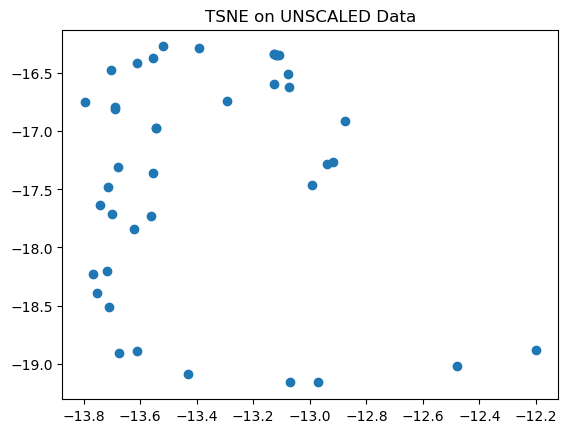

In [6]:
 # Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df.loc[:, num_cols])) # fit UNSCALED data

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1])
plt.title("TSNE on UNSCALED Data")
plt.show()

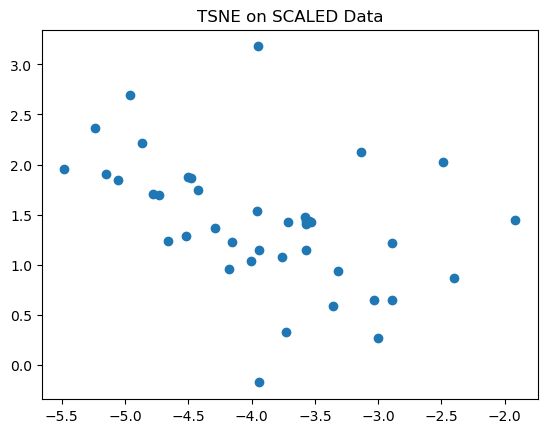

In [7]:
# Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled)) # fit SCALED data

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1])
plt.title("TSNE on SCALED Data")
plt.show()

#Check for Multicollinearity


In [8]:
# Correlations
corrs = df_scaled.corr()
corrs

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
price_change_percentage_24h,1.000000,0.169659,0.279682,0.292563,0.136974,-0.541190,-0.750630
price_change_percentage_7d,0.169659,1.000000,0.538294,0.056899,-0.145099,-0.052533,-0.038424
price_change_percentage_14d,0.279682,0.538294,1.000000,0.658040,0.376108,-0.039086,-0.116632
price_change_percentage_30d,0.292563,0.056899,0.658040,1.000000,0.745248,0.324777,0.016078
price_change_percentage_60d,0.136974,-0.145099,0.376108,0.745248,1.000000,0.499102,0.211242
price_change_percentage_200d,-0.541190,-0.052533,-0.039086,0.324777,0.499102,1.000000,0.879873
price_change_percentage_1y,-0.750630,-0.038424,-0.116632,0.016078,0.211242,0.879873,1.000000


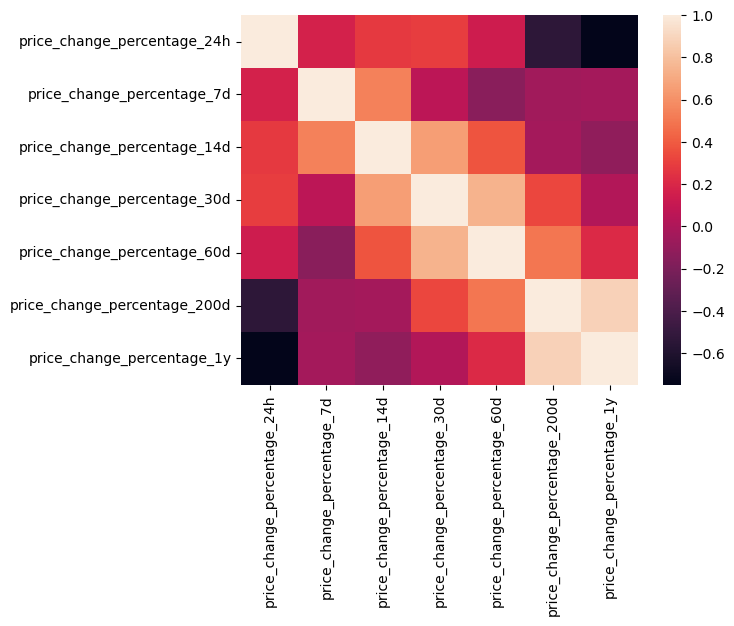

In [9]:
sns.heatmap(corrs)
plt.show()

In [10]:
# Define your "X" - features to predict
X = df_scaled

In [11]:
# Create a list with the number of k-values from 1 to 11
# Create a a list to store inertia values and the values of k
inertia = []
s_scores = []
vrc_scores = []

k = list(range(2, 10))

# LOOP 
for i in k:
    # Fit the Model
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(X)
    inertia.append(k_model.inertia_)

    # Silhoutte Score
    preds = k_model.predict(X)
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "inertia": inertia, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,inertia,s_score,vrc_scores
0,2,212.123342,0.690885,13.766470
1,3,165.136752,0.260810,14.021117
2,4,79.022435,0.314482,32.459853
3,5,66.413051,0.323913,29.892958
4,6,61.634088,0.251616,25.595599
5,7,46.074467,0.258868,29.631263
6,8,43.392694,0.252185,26.466078
7,9,32.913223,0.260185,30.879599


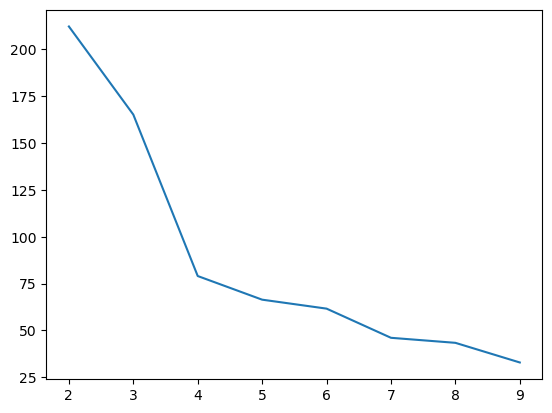

In [12]:
plt.plot(df_metrics.k, df_metrics.inertia)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4 would be the best value for K as it is the set with over 75% of the data with the second most best value being 5

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [13]:
# Initialize the K-Means model using the best value for k


In [14]:
# Make a copy
df_sub = X.copy()

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
df_sub['clusters'] = preds

df_sub.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


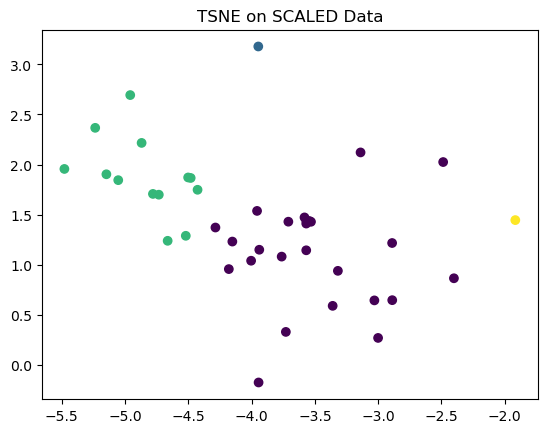

In [15]:
# Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=df_sub.clusters)
plt.title("TSNE on SCALED Data")
plt.show()

In [16]:
df_sub.loc[df_sub.clusters.isin([1,3])]

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
ethlend,-4.981042,-0.045178,-1.206956,-1.212126,0.047736,4.632380,6.088625,3
celsius-degree-token,1.045530,-0.618328,2.907054,5.351455,4.769913,3.148875,1.348488,1


# PCA

In [17]:
# Init PCA
n_components = len(df_scaled.columns)
pca = PCA(n_components=n_components)

# Fit the PCA model on the preprocessed DataFrame
pca_data = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])

df_pca.head()


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
0,-0.600667,0.842760,0.461595,-0.109151,-0.033786,0.225703,0.006595
1,-0.458261,0.458466,0.952877,0.095100,0.014588,-0.034158,0.109593
2,-0.433070,-0.168126,-0.641752,-0.470282,0.115300,0.127710,-0.086857
3,-0.471835,-0.222660,-0.479053,-0.737473,-0.148641,0.273472,0.134870
4,-1.157800,2.041209,1.859715,0.236479,-0.191787,0.411513,-0.070411


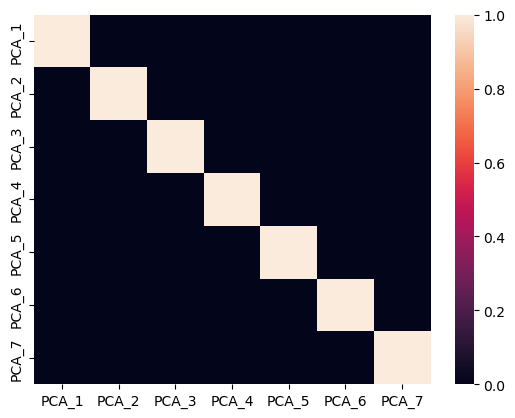

In [18]:
# sanity check -Heat Map
corrs = df_pca.corr()
sns.heatmap(corrs)
plt.show()

In [19]:
sum(pca.explained_variance_ratio_[0:3]) # 10 components make up 96% of the variance

0.8950316570309841

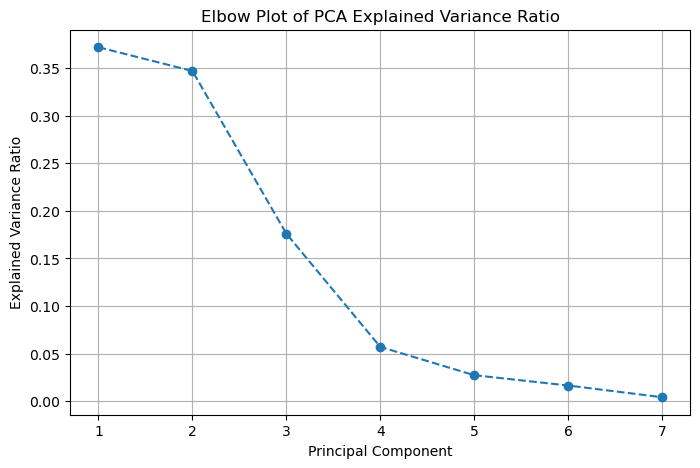

In [20]:
# See if dimensionality reduction will help

# Assume pca.explained_variance_ratio_ is already computed
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame from the explained variance ratio
df2 = pd.DataFrame({
    'Principal Component': range(1, n_components + 1),
    'Explained Variance Ratio': explained_variance_ratio
})

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(df2['Principal Component'], df2['Explained Variance Ratio'], marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Plot of PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

In [21]:
sum(pca.explained_variance_ratio_[0:3]) 

0.8950316570309841

In [22]:
df_pca = df_pca.loc[:, ["PCA_1","PCA_2","PCA_3"]]

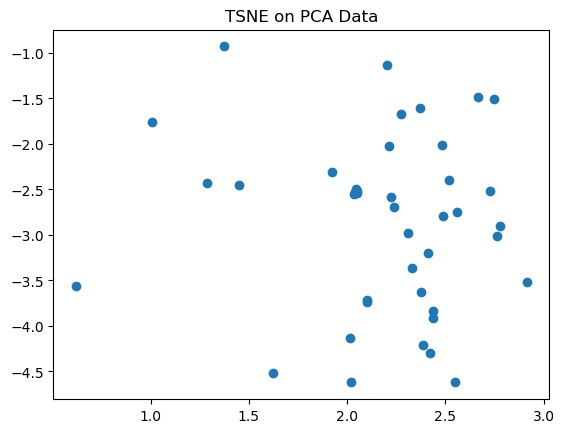

In [23]:
# Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_pca)) # fit PCA data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1])
plt.title("TSNE on PCA Data")
plt.show()

In [24]:
#Finding the KMEAN on the PCA Data
#•	K: The number of groups (clusters) you want to create.
# Means: The average of the points in each group.


In [25]:
X = df_pca

In [26]:
# Create a a list to store inertia values and the values of k
inertia = []
s_scores = []
vrc_scores = []

k = list(range(2, 10))

# LOOP 
for i in k:
    # Fit the Model
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(X)
    inertia.append(k_model.inertia_)

    # Silhoutte Score
    preds = k_model.predict(X)
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "inertia": inertia, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,inertia,s_score,vrc_scores
0,2,182.339530,0.728406,15.941950
1,3,135.442408,0.356130,17.034560
2,4,49.665497,0.420800,51.455694
3,5,38.672582,0.405662,50.780512
4,6,34.507577,0.334511,45.107936
5,7,23.728365,0.375378,55.678472
6,8,18.574523,0.316385,60.481348
7,9,15.572672,0.323751,61.980734


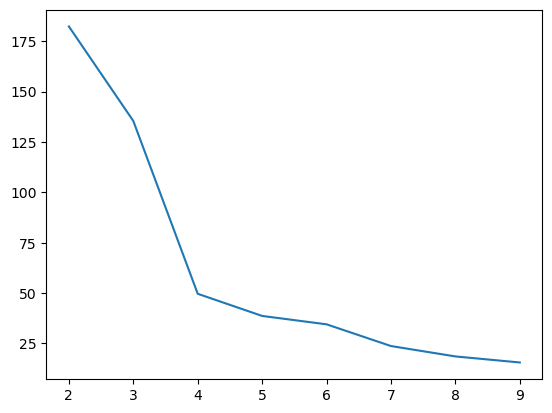

In [27]:
plt.plot(df_metrics.k, df_metrics.inertia)
plt.show()

In [28]:
# Agglomerative

# Create a a list to store metric values and the values of k
s_scores = []
vrc_scores = []

k = list(range(2, 10))

# LOOP 
for i in k:
    # Fit the Model
    model = AgglomerativeClustering(n_clusters=i)
    model.fit(X)

    # Silhoutte Score
    preds = model.labels_  # FIX: Use `labels_` instead of `predict()`
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,s_score,vrc_scores
0,2,0.744060,21.616483
1,3,0.741509,33.046144
2,4,0.426017,50.360119
3,5,0.359902,51.722281
4,6,0.369307,57.525342
5,7,0.362977,59.592919
6,8,0.309600,64.445060
7,9,0.323252,68.979059


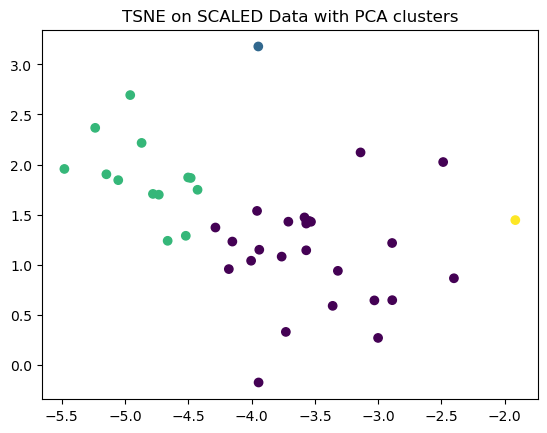

In [29]:
 # Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=df_sub.clusters)
plt.title("TSNE on SCALED Data with PCA clusters")
plt.show()

In [34]:
#Define Components 
n_components =3 
pca=PCA(n_components)



In [37]:
#Shrink the Data: You're taking a big dataset (df_scaled) and using a method called PCA to reduce its size while keeping as much important information as possible.

#Create New Table: After shrinking, you put the smaller, important pieces into a new table (df_pca).

#Peek at Data: Finally, you look at the first few rows of this new, smaller table to see what it looks like.

pca_data = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])

# Display the first few rows of the PCA DataFrame
df_pca.head()

,PCA_1,PCA_2,PCA_3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [38]:
#Print Explained Variance Ratio: This shows how much of the original data each new piece (component) keeps.

#Sum Explained Variance Ratio: 
#Adding these together shows how much of the total original data's important information is still there. 
#It should be close to 1, meaning almost everything is kept.


print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

[0.3719856  0.34700813 0.17603793]


0.8950316570309841

---

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components? (The total explained variance is the sum of how much each of the first three principal components explains of the original data.)

**Answer:** 
The sum 0.8950316570309841 indicates that together, these three components capture about 89.5% of the total information (variance) in the original data.


---

### Find the Best Value for k Using the Scaled PCA DataFrame

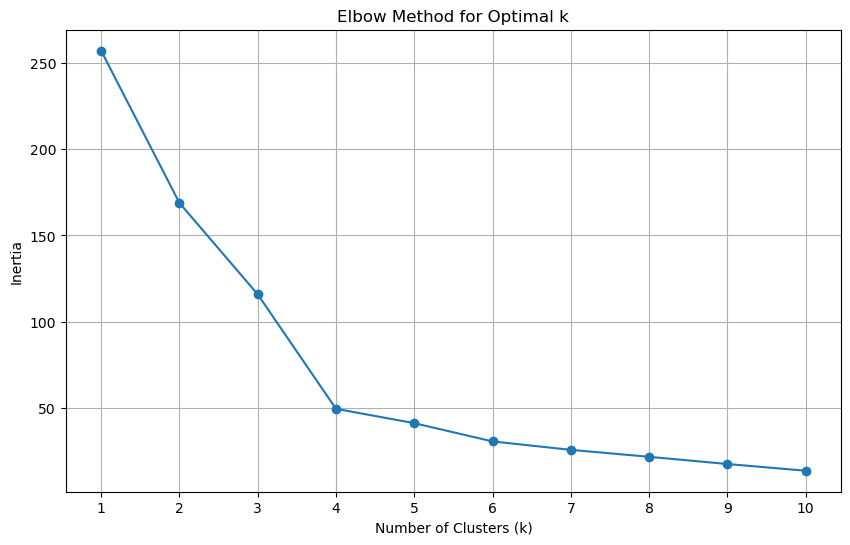

In [43]:
#Create a list to store inertia values and define a range for ( k ):

inertia = []
k_values = range(1, 11)  # You can adjust the range as needed
#Run K-means for each value of ( k ):

for k in k_values:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(df_pca)  # Replace df_stocks_pca with your PCA DataFrame
    inertia.append(model.inertia_)
#Plot the elbow curve:

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** the VRC score of 4 as it shows the most change in the shortest amount of clusters compared Sillouete score


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** only by 1 cluster compared to the original data.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

      PCA_1     PCA_2     PCA_3  Cluster
0 -0.600667  0.842760  0.461595        2
1 -0.458261  0.458466  0.952877        2
2 -0.433070 -0.168126 -0.641752        1
3 -0.471835 -0.222660 -0.479053        1
4 -1.157800  2.041209  1.859715        2


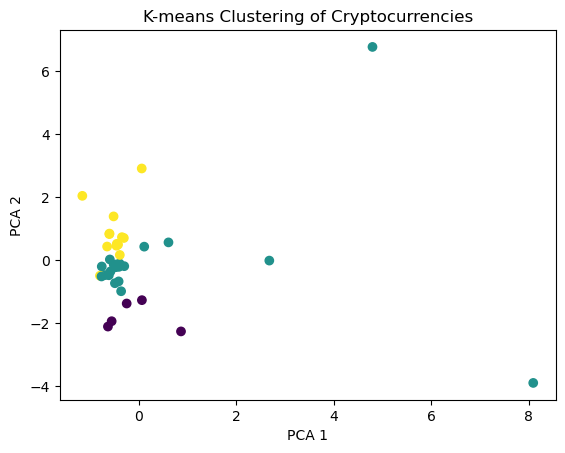

In [48]:
from sklearn.cluster import KMeans

# Define the number of clusters
k = 3  # You can change this based on the elbow method results

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

# Display the first few rows with cluster labels
print(df_pca.head())

# Optionally, visualize the clusters
import matplotlib.pyplot as plt

plt.scatter(df_pca['PCA_1'], df_pca['PCA_2'], c=df_pca['Cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-means Clustering of Cryptocurrencies')
plt.show()


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

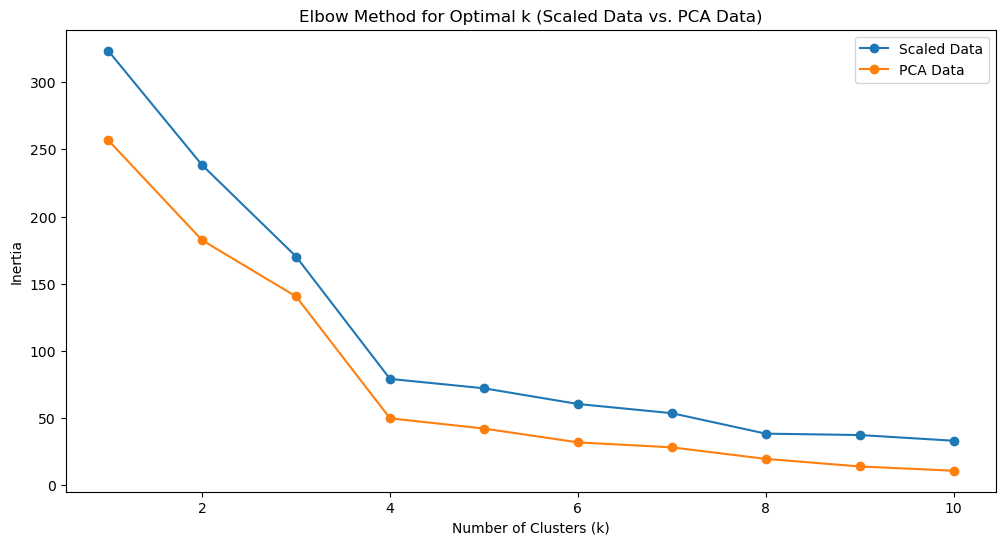

In [52]:

# Composite plot to contrast the Elbow curves



# Create lists to store inertia values for both datasets
inertia_scaled = []
inertia_pca = []

# Define the range for k
k_range = range(1, 11)

# Calculate inertia for each k (scaled data)
for k in k_range:
    kmeans_scaled = KMeans(n_clusters=k, random_state=42)
    kmeans_scaled.fit(df_scaled)
    inertia_scaled.append(kmeans_scaled.inertia_)

# Calculate inertia for each k (PCA-transformed data)
for k in k_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(df_pca.drop('Cluster', axis=1))
    inertia_pca.append(kmeans_pca.inertia_)

# Create a composite plot
plt.figure(figsize=(12, 6))

# Plot inertia for scaled data
plt.plot(k_range, inertia_scaled, marker='o', label='Scaled Data')

# Plot inertia for PCA-transformed data
plt.plot(k_range, inertia_pca, marker='o', label='PCA Data')

# Add labels and title
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (Scaled Data vs. PCA Data)')
plt.legend()
plt.show()


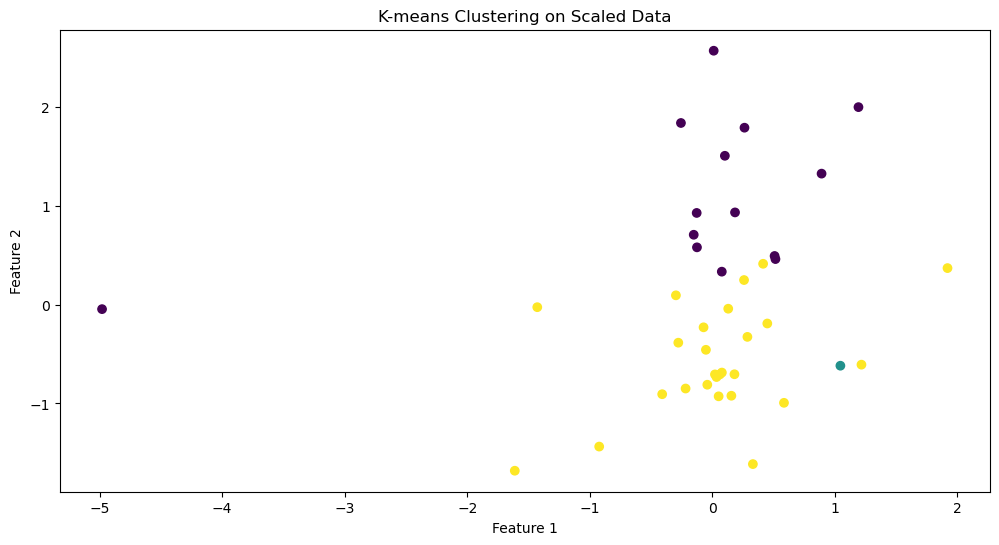

In [49]:
# Composite plot to contrast the clusters

# Perform K-means clustering on the scaled data
kmeans_original = KMeans(n_clusters=k, random_state=42)
df_scaled['Cluster'] = kmeans_original.fit_predict(df_scaled)

# Visualize the original clusters
plt.figure(figsize=(12, 6))
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=df_scaled['Cluster'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering on Scaled Data')
plt.show()


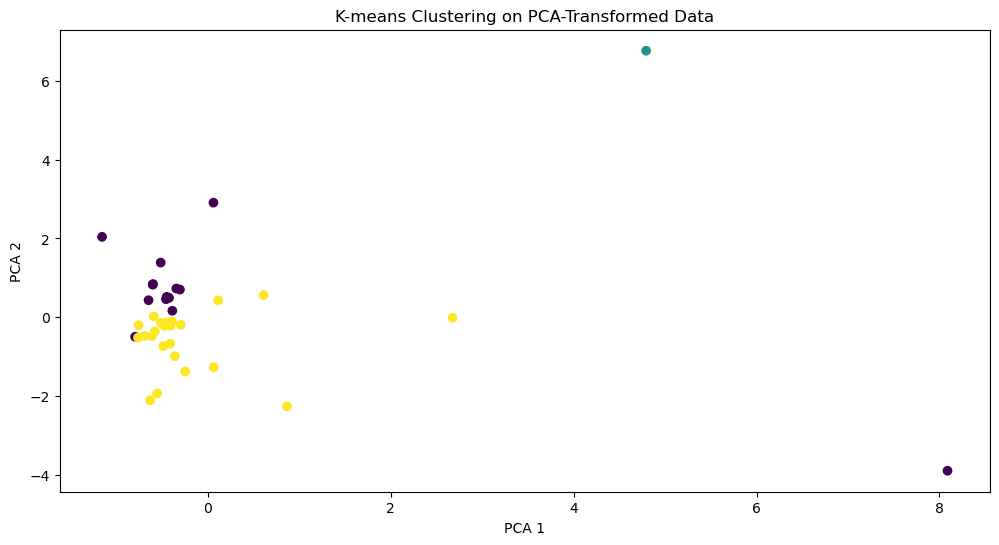

In [50]:
# Perform K-means clustering on the PCA-transformed data
kmeans_pca = KMeans(n_clusters=k, random_state=42)
df_pca['Cluster'] = kmeans_pca.fit_predict(df_pca)

# Visualize the PCA clusters
plt.figure(figsize=(12, 6))
plt.scatter(df_pca['PCA_1'], df_pca['PCA_2'], c=df_pca['Cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-means Clustering on PCA-Transformed Data')
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** fewer features help make clustering more understandable and efficient, but you need to balance keeping enough info to make meaningful groups without enough info, you will have less accurate groups which can lead to potential misleading results.